In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
# CNN 클래스 정의
class movieCNN(nn.Module):
    def __init__(self):
        super(movieCNN, self).__init__()
        # 첫 번째 합성곱 레이어: 입력 채널 3, 출력 채널 32, 커널 크기 5x5, 패딩 2 
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
        # 두 번째 합성곱 레이어: 입력 채널 32, 출력 채널 64, 커널 크기 5x5, 패딩 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        # 세 번째 합성곱 레이어: 입력 채널 64, 출력 채널 128, 커널 크기 5x5, 패딩 2
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, padding=2)
        # 네 번째 합성곱 레이어
        self.conv4 = nn.Conv2d(128, 256, kernel_size=5, padding=2)
        # 완전 연결 레이어 1: 입력 크기 256*14*14, 출력 크기 256
        self.fc1 = nn.Linear(256*14*14, 256) # 224/2/2/2/2 = 14 --> /2의 수는 합성곱 레이어 통과 횟수
        # 완전 연결 레이어 2: 입력 크기 256, 출력 크기 4 (클래스 수)
        self.fc2 = nn.Linear(256, 4)

    def forward(self, x):
        # 첫 번째 합성곱 레이어를 통과한 후 ReLU 활성화 함수를 적용하고 2x2 최대 풀링을 수행
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        # 두 번째 합성곱 레이어를 통과한 후 ReLU 활성화 함수를 적용하고 2x2 최대 풀링을 수행
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        # 세 번째 합성곱 레이어를 통과한 후 ReLU 활성화 함수를 적용하고 2x2 최대 풀링을 수행
        x = F.relu(F.max_pool2d(self.conv3(x), 2))    
        # 네 번째 합성곱 레이어를 통과한 후 ReLU 활성화 함수를 적용하고 2x2 최대 풀링을 수행
        x = F.relu(F.max_pool2d(self.conv4(x), 2)) 
        # 출력을 위해 텐서를 1차원으로 평탄화            
        x = x.view(-1, 256*14*14)
        # 첫 번째 완전 연결 레이어를 통과한 후 ReLU 활성화 함수를 적용
        x = F.relu(self.fc1(x))
        # 두 번째 완전 연결 레이어를 통과한 후 log-softmax 함수를 적용하여 클래스 확률을 계산
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [9]:
# CNN 클래스 정의
class movieCNN(nn.Module):
    def __init__(self):
        super(movieCNN, self).__init__()
        # 첫 번째 합성곱 레이어: 입력 채널 3, 출력 채널 32, 커널 크기 5x5, 패딩 2 
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2)
        # 두 번째 합성곱 레이어: 입력 채널 32, 출력 채널 64, 커널 크기 5x5, 패딩 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        # 세 번째 합성곱 레이어: 입력 채널 64, 출력 채널 128, 커널 크기 5x5, 패딩 2
        self.conv3 = nn.Conv2d(64, 128, kernel_size=5, padding=2)

        # 완전 연결 레이어 1: 입력 크기 128*14*14, 출력 크기 128
        self.fc1 = nn.Linear(128*28*28, 128) # 224/2/2/2/2 = 14 --> /2의 수는 합성곱 레이어 통과 횟수
        # 완전 연결 레이어 2: 입력 크기 128, 출력 크기 4 (클래스 수)
        self.fc2 = nn.Linear(128, 4)

    def forward(self, x):
        # 첫 번째 합성곱 레이어를 통과한 후 ReLU 활성화 함수를 적용하고 2x2 최대 풀링을 수행
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        # 두 번째 합성곱 레이어를 통과한 후 ReLU 활성화 함수를 적용하고 2x2 최대 풀링을 수행
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        # 세 번째 합성곱 레이어를 통과한 후 ReLU 활성화 함수를 적용하고 2x2 최대 풀링을 수행
        x = F.relu(F.max_pool2d(self.conv3(x), 2))    

        # 출력을 위해 텐서를 1차원으로 평탄화            
        x = x.view(-1, 128*28*28)
        # 첫 번째 완전 연결 레이어를 통과한 후 ReLU 활성화 함수를 적용
        x = F.relu(self.fc1(x))
        # 두 번째 완전 연결 레이어를 통과한 후 log-softmax 함수를 적용하여 클래스 확률을 계산
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [4]:
from torch.utils.data import random_split

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4353, 0.3869, 0.3654], 
                         std=[0.3312, 0.3134, 0.3065])
])

# 데이터셋 불러오기
nespresso_dataset = datasets.ImageFolder(root="./four_genre_posters_updated", transform=transform)

# 데이터셋을 train과 test로 무작위로 분리
train_dataset, test_dataset = random_split(nespresso_dataset, [0.8, 0.2])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [11]:
# # train 데이터셋 이미지 일부 랜덤 시각화
# import matplotlib.pyplot as plt

# # train_loader에서 반복하여 이미지와 레이블을 가져와서 시각화
# fig, axes = plt.subplots(4, 4, figsize=(10, 10))
# axes = axes.ravel()

# for i, (images, labels) in enumerate(train_loader):
#     for j in range(len(images)):
#         index = i * len(images) + j  # 전체 인덱스 계산
#         if index >= len(axes):  # 축 배열을 벗어나면 루프 종료
#             break
#         ax = axes[index]
#         ax.imshow(images[j].permute(1, 2, 0))  # 이미지의 차원을 변경하여 imshow에 적합한 형식으로 변환
#         ax.set_title(f"Class: {labels[j]}")
#         ax.axis('off')

# plt.tight_layout()
# plt.show()


In [ ]:
# # test 데이터셋 이미지 일부 랜덤 시각화
# import matplotlib.pyplot as plt

# # train_loader에서 반복하여 이미지와 레이블을 가져와서 시각화
# fig, axes = plt.subplots(4, 4, figsize=(10, 10))
# axes = axes.ravel()

# for i, (images, labels) in enumerate(test_loader):
#     for j in range(len(images)):
#         index = i * len(images) + j  # 전체 인덱스 계산
#         if index >= len(axes):  # 축 배열을 벗어나면 루프 종료
#             break
#         ax = axes[index]
#         ax.imshow(images[j].permute(1, 2, 0))  # 이미지의 차원을 변경하여 imshow에 적합한 형식으로 변환
#         ax.set_title(f"Class: {labels[j]}")
#         ax.axis('off')

# plt.tight_layout()
# plt.show()

In [13]:
model = movieCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

In [14]:
# 손실과 정확도를 저장하기 위한 리스트
train_losses = []
test_losses = []
test_accuracies = []

# 훈련 함수
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0 # 현재 에포크의 훈련 손실을 저장하기 위한 변수를 초기화
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
    # 평균 훈련 손실 계산
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch{epoch}, Training loss: {train_loss:.4f}')

# 테스트 함수
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct +=pred.eq(target.view_as(pred)).sum().item()
        test_loss /= len(test_loader)
        accuracy = 100. * correct / len(test_loader.dataset)
        test_losses.append(test_loss)
        test_accuracies.append(accuracy)
        print(f'Test loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

In [15]:
# 실행 동안 test_loss가 5번 이상 개선되지 않을 때 조기 종료됨.
best_loss = float('inf')
no_improvement = 0
patience = 5

for epoch in range(1, 50):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)
    
    # 검증 손실 계산
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
        test_loss /= len(test_loader)
        
        # 최저 검증 손실 업데이트 및 조기 종료 체크
        if test_loss < best_loss:
            best_loss = test_loss
            no_improvement = 0
        else:
            no_improvement += 1
            if no_improvement >= patience:
                print(f'Early stopping at epoch {epoch}')
                break


Epoch1, Training loss: 1.2929
Test loss: 1.1401, Accuracy: 50.53%
Epoch2, Training loss: 1.1082
Test loss: 1.1840, Accuracy: 46.92%
Epoch3, Training loss: 1.0645
Test loss: 1.2119, Accuracy: 47.56%
Epoch4, Training loss: 0.9789
Test loss: 1.0774, Accuracy: 54.35%
Epoch5, Training loss: 0.8725
Test loss: 1.1314, Accuracy: 52.87%
Epoch6, Training loss: 0.6881
Test loss: 1.2214, Accuracy: 54.35%
Epoch7, Training loss: 0.5243
Test loss: 1.5023, Accuracy: 50.96%
Epoch8, Training loss: 0.3749
Test loss: 1.7518, Accuracy: 45.22%
Epoch9, Training loss: 0.2338
Test loss: 2.1608, Accuracy: 50.32%
Early stopping at epoch 9


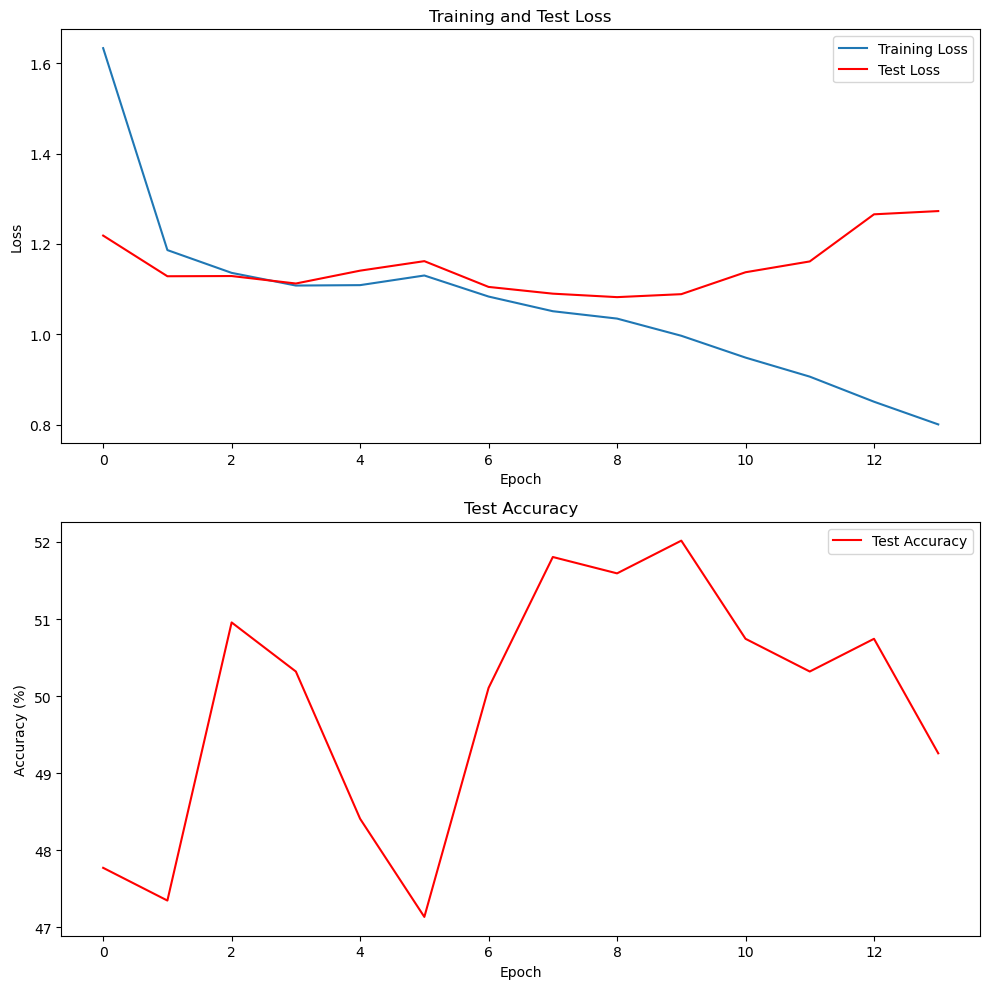

In [77]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].plot(train_losses, label='Training Loss')
axs[0].plot(test_losses, label='Test Loss', color='Red')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(test_accuracies, label='Test Accuracy', color='Red')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Test Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

def visualize_predictions(model, test_loader, class_names, num_images=10):
    model.eval()
    fig = plt.figure(figsize=(15, 8))
    fig.suptitle('Predictions vs Ground Truth', fontsize=16)
    
    # 무작위 이미지를 선택하기 위해 DataLoader에서 무작위로 이미지 선택
    random_indices = random.sample(range(len(test_loader.dataset)), num_images)
    random_sampler = torch.utils.data.SubsetRandomSampler(random_indices)
    random_loader = torch.utils.data.DataLoader(test_loader.dataset, batch_size=1, sampler=random_sampler)
    
    current_row = 0  # 현재 행 번호 초기화
    current_col = 0  # 현재 열 번호 초기화
    
    with torch.no_grad():
        for i, (images, labels) in enumerate(random_loader):  # random_loader 사용
            if i == num_images:
                break
            
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predicted = predicted.cpu().numpy()
            images = images.cpu().numpy()
            labels = labels.cpu().numpy()
            
            for j in range(images.shape[0]):
                ax = fig.add_subplot((num_images + 4) // 5, 5, current_row * 5 + current_col + 1)  # 열 개수를 5로 고정
                ax.axis('off')
                ax.set_title(f'Pred: {class_names[predicted[j]]}\nActual: {class_names[labels[j]]}', color=('green' if predicted[j] == labels[j] else 'red'))
                ax.imshow(np.transpose(images[j], (1, 2, 0)))
                
                current_col += 1  # 열 번호 증가
                if current_col >= 5:  # 현재 열이 5개 이상이면 다음 행으로 이동
                    current_row += 1
                    current_col = 0
    
    plt.tight_layout()
    plt.show()

# 시각화 함수 호출
class_names = ['Action', 'Comedy', 'Horror', 'Romance']
num_images = 10
visualize_predictions(model, test_loader, class_names, num_images)
